In [2]:
import json
import ast
import matplotlib.pyplot as plt
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
import sys, os
sys.path.append(os.path.abspath('..'))
from shared import generate



# *Indirect Speech Act Scenario*

### **Identify and Explain Issue**

In [9]:
def identify_explain(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, your task is to evaluate which person, if any, needs to improve their communication. One of the two speakers is autistic. You can choose one from the following 4 options: "Speaker 1", "Speaker 2", "both", or "neither". Explain your decision. You must output a dictionary formatted exactly as follows with no extra tags or text: { "fault":"Speaker # or neither", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [10]:
with open('../indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Do you know where the nearest coffee shop is?',
  'Speaker 2': 'Yes, I know where it is.'},
 {'Speaker 1': 'Is there any place we can park nearby?',
  'Speaker 2': 'Yes, there is a place to park.'}]

In [11]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = identify_explain(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [12]:
with open('../indirect_analysis_data/identify_explain_ctx_autism.json', 'w') as f:
    json.dump(results, f, indent=2)


In [13]:
with open('../indirect_analysis_data/identify_explain_ctx_autism.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'fault': 'Speaker 2',
  'explanation': "Speaker 2 needs to improve their communication. While they affirm that they know the location of the nearest coffee shop, they don't provide the actual information that Speaker 1 is seeking. To communicate more effectively, Speaker 2 should have either given directions to the coffee shop or indicated that they would if more context or a request was given."},
 {'fault': 'neither',
  'explanation': 'Both speakers are engaging in a clear and functional exchange of information. Speaker 1 asks a specific, straightforward question about the availability of parking nearby, and Speaker 2 provides a direct and concise affirmative answer. There is no indication of miscommunication or misunderstanding. The clarity and relevance of their responses suggest that both are effectively communicating.'}]

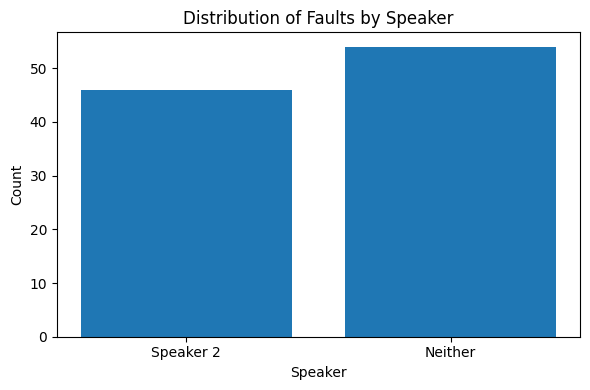

In [14]:
normalized_faults = []
for r in results_loaded:
    fault = r['fault'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    elif "both" in fault:
        normalized_faults.append("Both")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Faults by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### **Feedback on How Communication Can be Improved**

In [15]:
def provide_feedback(dialogue):
  return generate(model = 'gpt-4o',
        system = '''Analyze the dialogue as specified below.''',
        query = dialogue + '''\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, what feedback, if at all, would you provide to one or both speakers for improving their communication? One of the two speakers is autistic. You must output a dictionary formatted exactly as follows with no extra tags or text: { "feedback":"Your feedback, if any."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [16]:
with open('../indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Do you know where the nearest coffee shop is?',
  'Speaker 2': 'Yes, I know where it is.'},
 {'Speaker 1': 'Is there any place we can park nearby?',
  'Speaker 2': 'Yes, there is a place to park.'}]

In [17]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = provide_feedback(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(10)))


In [18]:
with open('../indirect_analysis_data/provide_feedback_ctx_autism.json', 'w') as f:
    json.dump(results, f, indent=2)


In [19]:
with open('../indirect_analysis_data/provide_feedback_ctx_autism.json') as f:
    results_loaded = json.load(f)

results_loaded[0:10]


[{'feedback': 'Speaker 2 could offer more specific information to help Speaker 1. For example, providing the name of the coffee shop and giving directions would make the communication more effective and helpful.'},
 {'feedback': 'It might be helpful for Speaker 2 to provide more specific information on the location or directions for the parking. Clear and precise details can improve understanding and reduce the need for follow-up questions.'},
 {'feedback': "The communication is clear, but Speaker 2 could improve it by directly answering the question with the specific time of the meeting, which would provide more immediate clarity: 'Yes, the meeting starts at 10 AM' or 'The meeting starts at 10 AM.' This could be particularly helpful if one of the speakers is autistic and may benefit from more direct and explicit information."},
 {'feedback': 'Speaker 2 could provide more specific information regarding the updates to ensure clear communication. For example, they could mention what the 